In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

%matplotlib inline
import json 


# Dataset with revenue and budget adjusted for inflation

In [2]:
# NUMERICAL DATA
# UNI VARIATE STAT
#import cleaned data
movie_data=pd.read_csv("clean_data.csv")
#display data
movie_data.head()


,BUDGET,POPULARITY,REVENUE,RUNTIME,VOTE_AVERAGE,VOTE_COUNT,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
0,200000000,936.725,57000000,115.0,7.3,2445,2020,4,212000000,60420000,7
1,17000000,641.633,35878266,114.0,7.1,602,2020,7,18020000,38030961,7
2,75000000,361.237,201858461,109.0,7.2,6022,2020,5,79500000,213969968,7
3,90000000,337.346,419074646,124.0,7.2,5392,2020,1,95400000,444219124,7
4,42000000,253.895,30234182,110.0,7.0,3216,2020,5,44520000,32048232,7


In [3]:
#display data info
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BUDGET         5416 non-null   int64  
 1   POPULARITY     5416 non-null   float64
 2   REVENUE        5416 non-null   int64  
 3   RUNTIME        5416 non-null   float64
 4   VOTE_AVERAGE   5416 non-null   float64
 5   VOTE_COUNT     5416 non-null   int64  
 6   release_year   5416 non-null   int64  
 7   release_month  5416 non-null   int64  
 8   New_Budget     5416 non-null   int64  
 9   New_Revenue    5416 non-null   int64  
 10  New_Vote_Avg   5416 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 465.6 KB


In [4]:
#display described data
movie_data.describe()

,BUDGET,POPULARITY,REVENUE,RUNTIME,VOTE_AVERAGE,VOTE_COUNT,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
count,5.416000e+03,5416.000000,5.416000e+03,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5.416000e+03,5.416000e+03,5416.000000
mean,3.456561e+07,19.398283,9.838571e+07,109.115214,6.328619,1695.707349,2006.813516,6.750923,4.742542e+07,1.331311e+08,6.322009
std,4.263966e+07,26.162331,1.865449e+08,21.322490,0.901775,2767.024743,7.780242,3.505832,5.548877e+07,2.409670e+08,0.942131
min,1.000000e+00,0.600000,1.000000e+00,0.000000,0.000000,1.000000,1990.000000,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,7.000000e+06,9.301250,6.414526e+06,95.000000,5.800000,174.000000,2001.000000,4.000000,9.442400e+06,8.935109e+06,6.000000
50%,2.000000e+07,13.602000,3.098968e+07,105.000000,6.400000,658.500000,2008.000000,7.000000,2.698000e+07,4.312673e+07,6.000000
75%,4.500000e+07,21.862000,1.064767e+08,120.000000,6.900000,1950.750000,2013.000000,10.000000,6.319850e+07,1.452608e+08,7.000000
max,3.800000e+08,936.725000,2.797801e+09,339.000000,10.000000,27342.000000,2020.000000,12.000000,4.722640e+08,3.781250e+09,10.000000


# NUMERICAL DATA
# UNI VARIATE STAT


In [5]:
def Bi_Variate(data, var1: str, var2: str):
    jointDF = pd.concat([data[var1], data[var2]], axis = 1)
    # Draw jointplot of the two variables in the joined dataframe
    f = plt.figure(figsize=(24, 4))
    sb.jointplot(data = jointDF, x = var1, y = var2, height = 12)
    
   
   
def Correlation(data, var1: str, var2: str):
    jointDF = pd.concat([data[var1], data[var2]], axis = 1)
    f = plt.figure(figsize=(8, 4))
    sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
    
    
def Uni_Variate(data):
    
    data.describe()
    # Set up matplotlib figure with three subplots
    f, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot the basic uni-variate figures
    sb.violinplot(data = data, orient = "h", ax = axes[0])
    sb.boxplot(data = data, orient = "h", ax = axes[1])
    sb.histplot(data = data, ax = axes[2])

def PlotHist(data, var1: str, var2: str):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,8))
    sb.histplot(data[var1], ax=ax1, kde=True)
    sb.histplot(data[var2], ax=ax2, kde=True)



def ViolinPlot(movie_data, var: str):
    #Set up matplotlib figure with three subplots
    f, axes = plt.subplots(figsize=(24, 6))

    # Plot the basic uni-variate figures
    sb.violinplot(data=movie_data[var], orient = "h")
    
def fixskew(data):
    data = np.log(data + 1)

    f = plt.figure(figsize=(15,6))

    sb.histplot(data, kde=True)

# Popular keywords in OVERVIEW and TAGLINE

In [6]:
# movie_data['TAGLINE'] = movie_data['TAGLINE'].astype('str')
# movie_data['OVERVIEW'] = movie_data['OVERVIEW'].astype('str')
# overview=' '.join(movie_data["OVERVIEW"])
# tagline = ' '.join(movie_data['TAGLINE'])

In [7]:
# overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview)
# plt.figure(figsize=(16,8))
# plt.imshow(overview_wordcloud)
# plt.axis('off')
# plt.show()

In [8]:
# tagline_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(tagline)
# plt.figure(figsize=(16,8))
# plt.imshow(tagline_wordcloud)
# plt.axis('off')
# plt.show()

# Movie Revenue and Release Month and Years

<AxesSubplot:title={'center':'Year Vs Movie Number'}, xlabel='release_year,release_year', ylabel='Movie Number'>

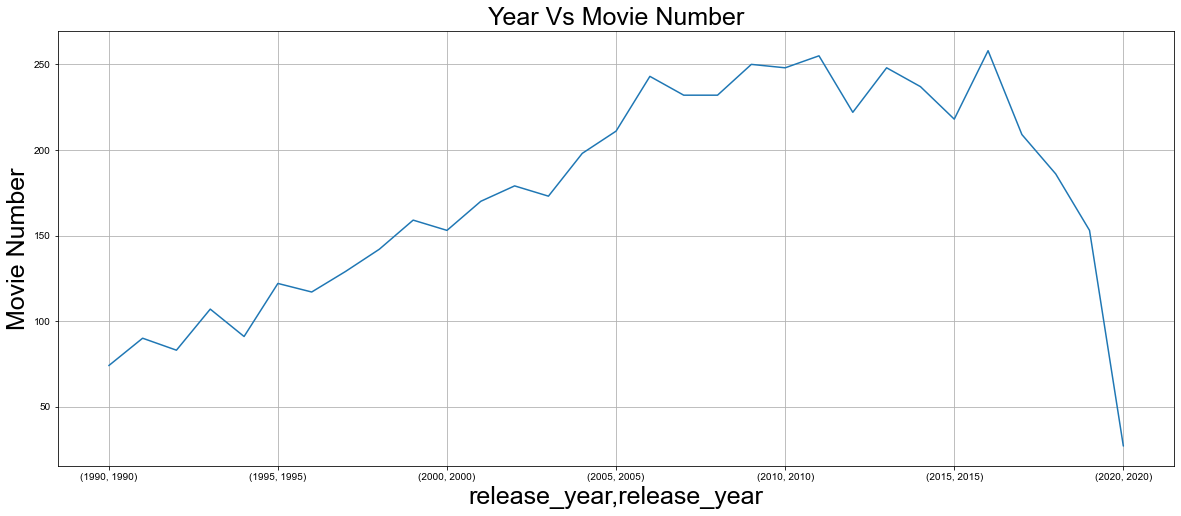

In [9]:
# Setup the size, title and labels of the figure
f = plt.figure(figsize=(20, 8))
plt.title("Year Vs Movie Number",fontsize = 25)
plt.xlabel('Release year',fontsize = 25)
plt.ylabel('Movie Number',fontsize = 25)
sb.set(style="darkgrid", font_scale=1.5)

movie_data.groupby('release_year')['release_year'].value_counts().plot()

<AxesSubplot:title={'center':'Release Month Vs Revenue'}, xlabel='release_month', ylabel='New_Revenue'>

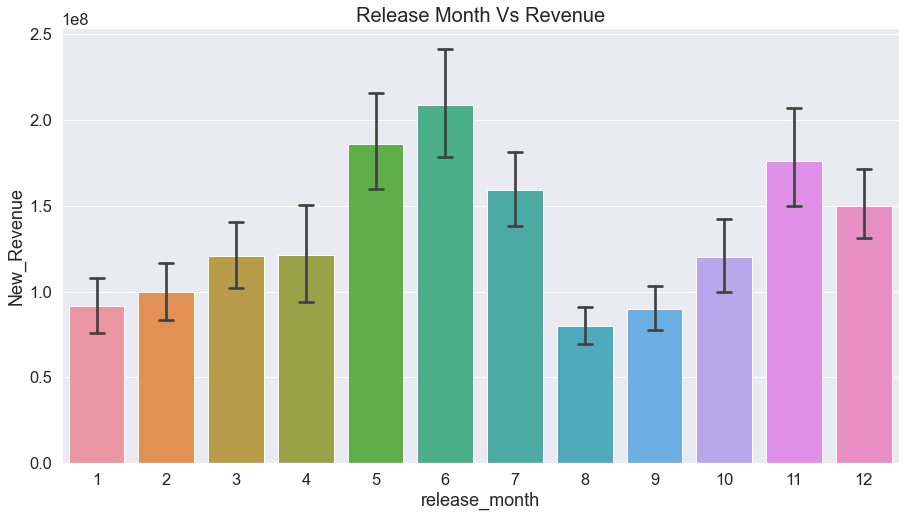

In [10]:
# Set the figure size, labels and style sheet
f = plt.figure(figsize=(15, 8))
plt.title("Release Month Vs Revenue", fontsize = 20)
plt.xlabel('Release Month',fontsize = 18)
plt.ylabel('Revenue',fontsize = 18)
sb.set(style="whitegrid", font_scale=1.5)

# Plot with error bars
sb.barplot(x = movie_data['release_month'], y = movie_data['New_Revenue'], capsize=.2)

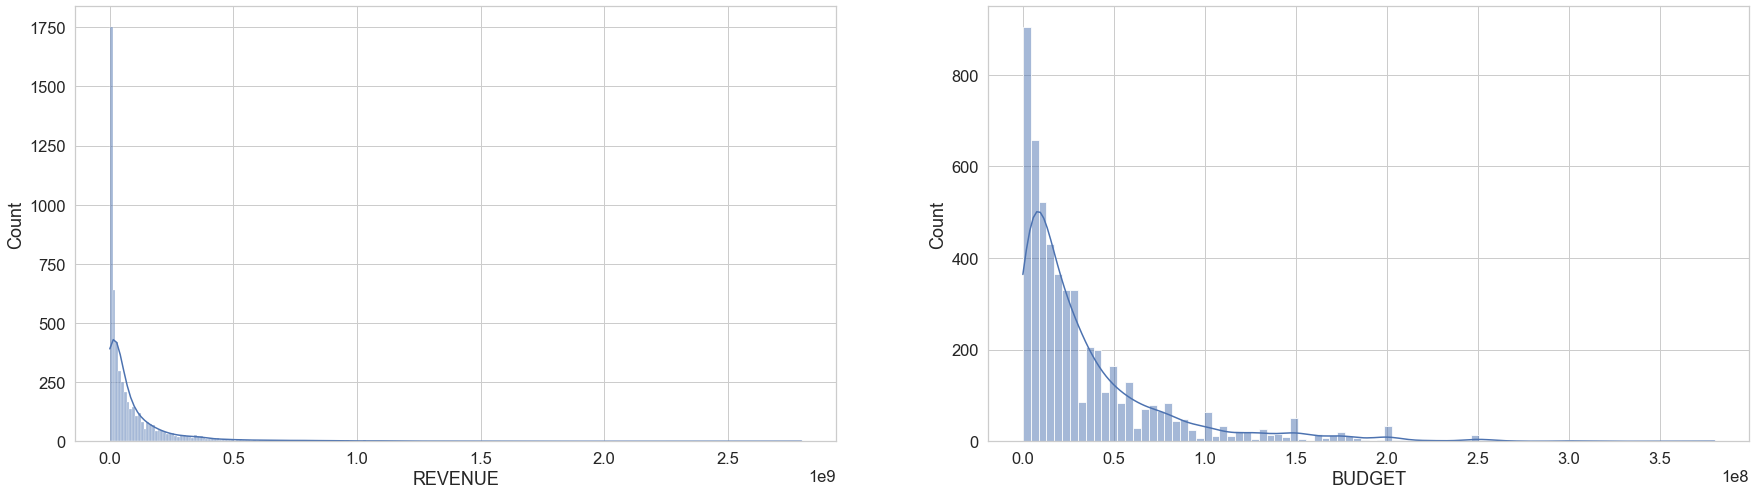

In [11]:
PlotHist(movie_data, "REVENUE", "BUDGET")

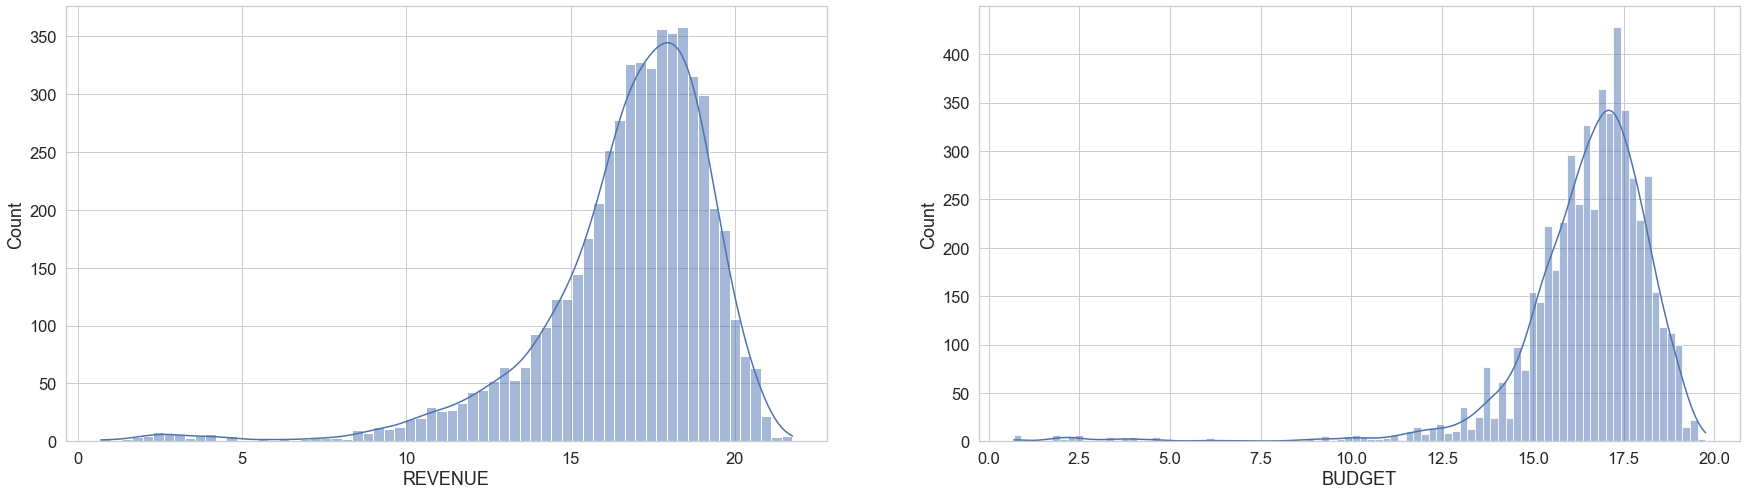

In [12]:
movie_data["BUDGET"] = np.log(movie_data["BUDGET"] + 1)
movie_data["REVENUE"] = np.log(movie_data["REVENUE"] + 1)

PlotHist(movie_data, "REVENUE", "BUDGET")

# PREDICTING REVENUE USING BUDGET

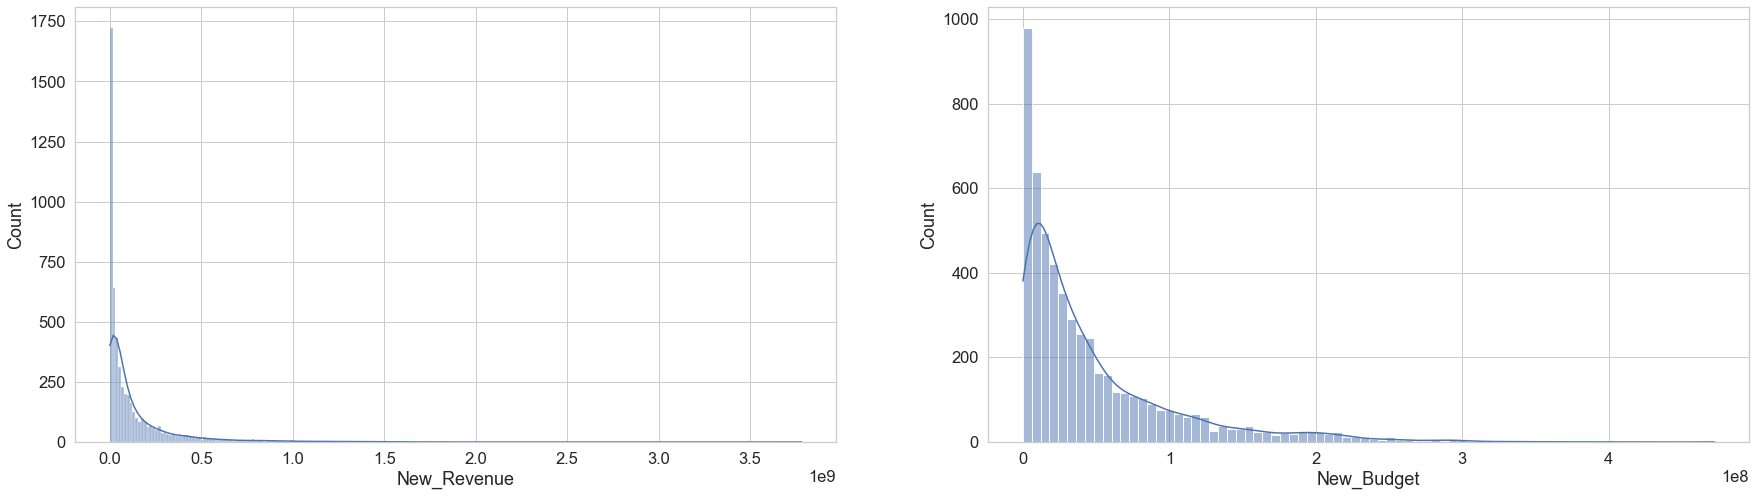

In [13]:
PlotHist(movie_data, "New_Revenue", "New_Budget")

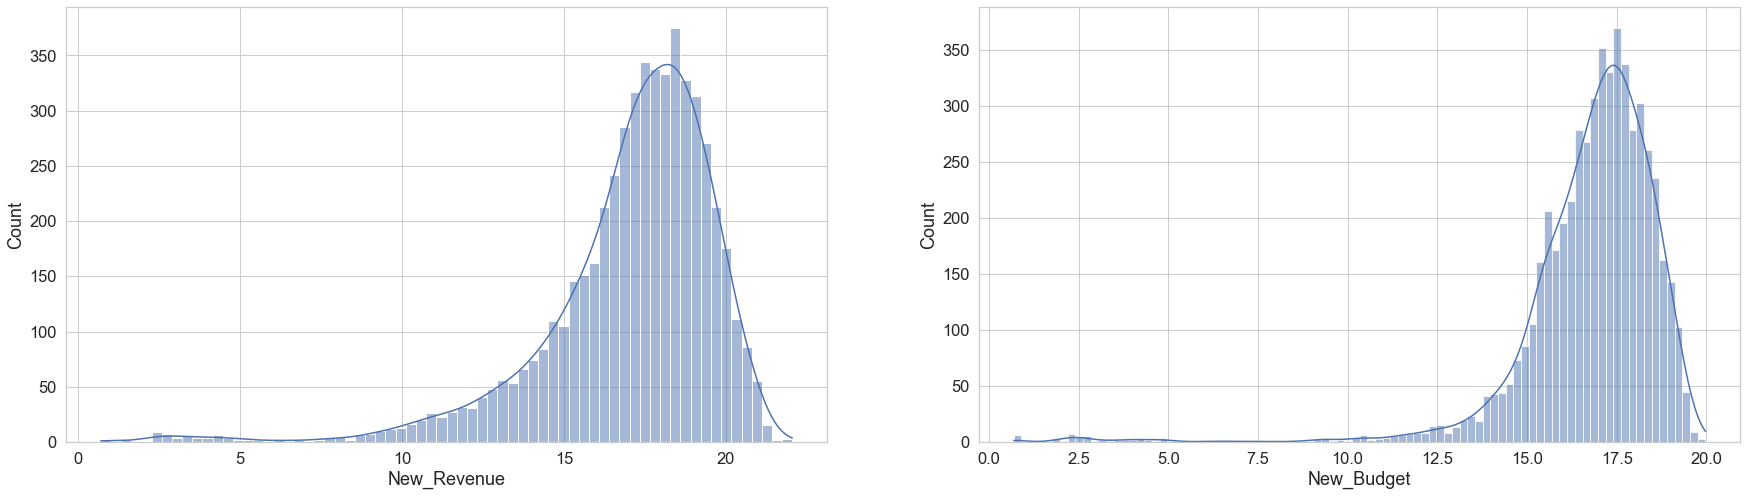

In [14]:
movie_data["New_Budget"] = np.log(movie_data["New_Budget"] + 1)
movie_data['New_Revenue'] = np.log(movie_data['New_Revenue'] + 1)

PlotHist(movie_data, 'New_Revenue', "New_Budget")

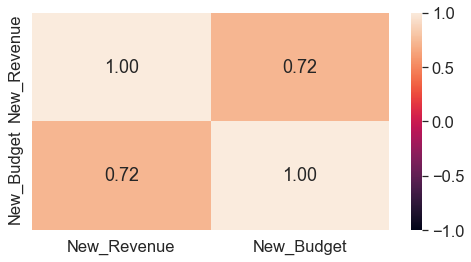

In [15]:
#Correlation between 2 variable/column
Correlation(movie_data, 'New_Revenue', "New_Budget")

<Figure size 1728x288 with 0 Axes>

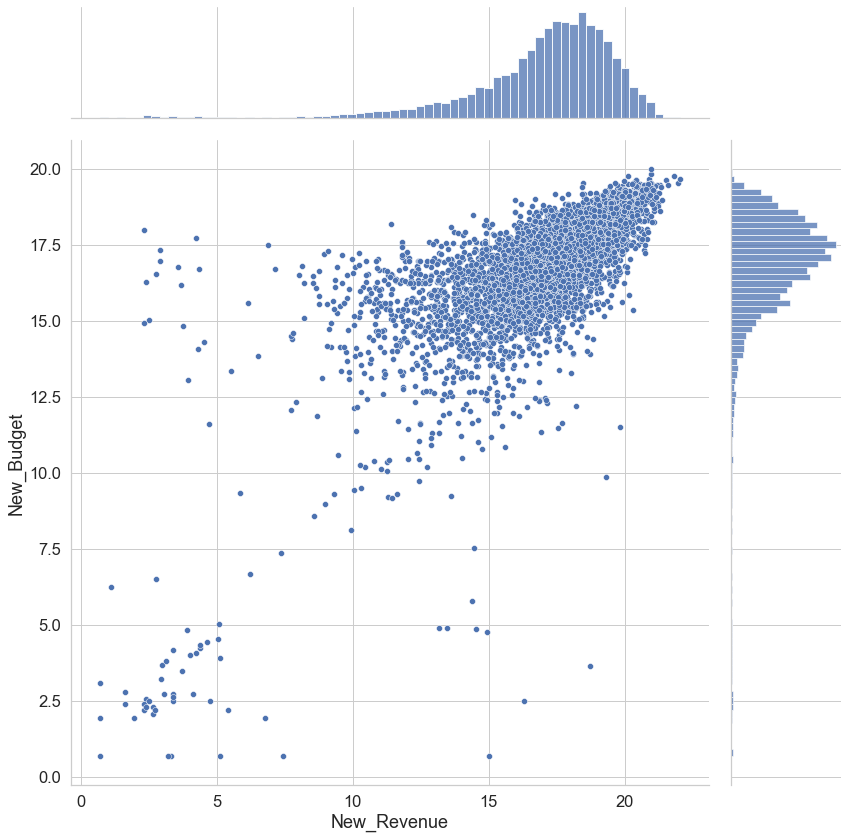

In [16]:
Bi_Variate(movie_data, 'New_Revenue', "New_Budget")

# LINEAR REGRESSION FOR REVENUE AND BUDGET

In [17]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
LinearReg = LinearRegression()
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(movie_data['New_Revenue'])
X = pd.DataFrame(movie_data["New_Budget"])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (4062, 1) (4062, 1)
Test Set  : (1354, 1) (1354, 1)


In [18]:
LinearReg.fit(X_train, y_train)
print('Intercept : b = ', LinearReg.intercept_)
print('Coefficients : a = ', LinearReg.coef_)

Intercept : b =  [0.89692973]
Coefficients : a =  [[0.96235373]]


In [19]:
# Formula for the Regression line
regline_x = X_train
regline_y = LinearReg.intercept_ + LinearReg.coef_ * X_train

# Goodness of Fit of the Linear Regression Model

Performance on Train Data:
Explained Variance (R^2) 	: 0.5069393988364966
Mean Squared Error (MSE) 	: 3.53721355253645


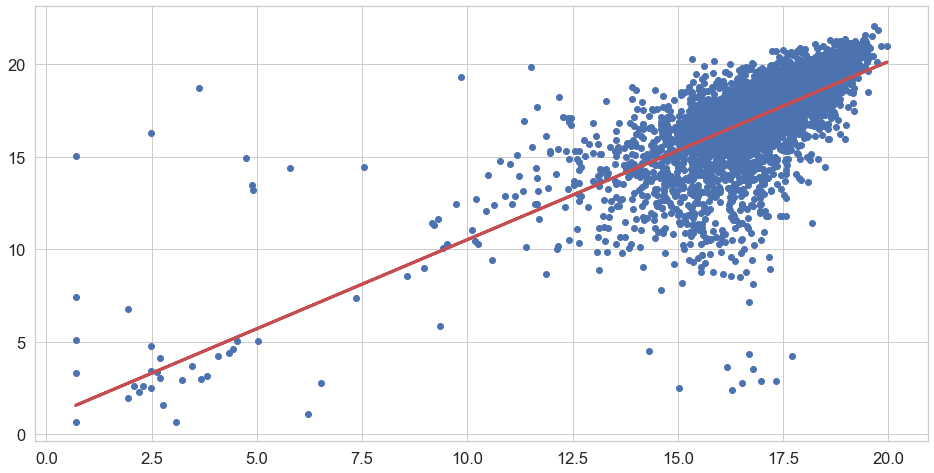

In [20]:
# Explained Variance in simply the "Score"
print("Performance on Train Data:")
print("Explained Variance (R^2) \t:", LinearReg.score(X_train, y_train))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = LinearReg.predict(X_train)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Goodness of Fit of the Ridge Regression Model

Performance on Train Data:
Mean Squared Error (MSE) on test 	: 3.5372135668282727
Explained Variance (R^2) on test 	: 0.5069393968443254

Performance on Test Data:
Mean Squared Error (MSE) on test 	: 3.623560099454473
Explained Variance (R^2) on test 	: 0.5656085215866724


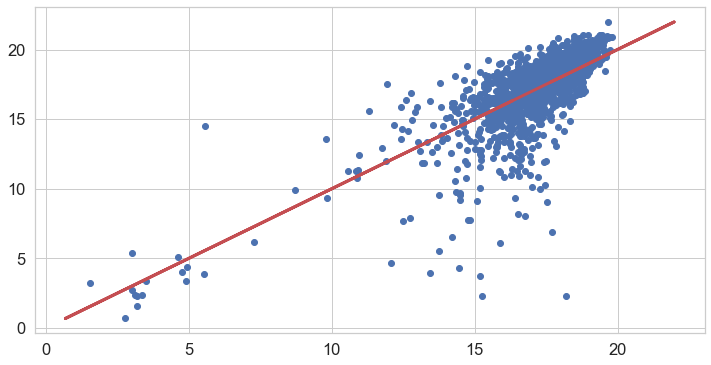

In [21]:
from sklearn.linear_model import Ridge

# define model
model_RR = Ridge(alpha=1.0)

# fit model
model_RR.fit(X_train, y_train)

# make a prediction
prediction_RR_test = model_RR.predict(X_test)
prediction_RR_train = model_RR.predict(X_train)

# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_RR_train))
print("Explained Variance (R^2) on test \t:", model_RR.score(X_train, y_train))
print("")

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_RR_test))
print("Explained Variance (R^2) on test \t:", model_RR.score(X_test, y_test))

# plot graph
f = plt.figure(figsize=(12,6))
plt.scatter(prediction_RR_test,y_test)
plt.plot(y_test,y_test,'r-',linewidth=3)
plt.show()

# Goodness of Fit of the LASSO Regression Model

Performance on Train Data:
Mean Squared Error (MSE) on test 	: 3.7918686908272585
Explained Variance (R^2) on test 	: 0.47144241407429455

Performance on Test Data:
Mean Squared Error (MSE) on test 	: 4.062306016173247
Explained Variance (R^2) on test 	: 0.5130117708276682


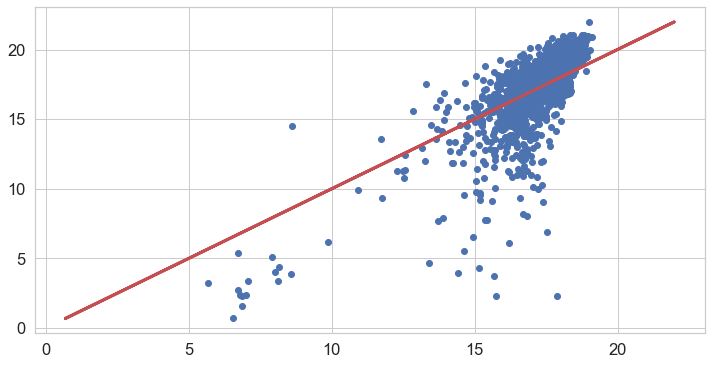

In [22]:
from sklearn.linear_model import Lasso

# define model
model_LAR = Lasso(alpha=1.0)

# fit model
model_LAR.fit(X_train, y_train)

# make a prediction
prediction_LAR_test = model_LAR.predict(X_test)
prediction_LAR_train = model_LAR.predict(X_train)

# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_LAR_train))
print("Explained Variance (R^2) on test \t:", model_LAR.score(X_train, y_train))
print("")

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_LAR_test))
print("Explained Variance (R^2) on test \t:", model_LAR.score(X_test, y_test))

# plot graph
f = plt.figure(figsize=(12,6))
plt.scatter(prediction_LAR_test,y_test)
plt.plot(y_test,y_test,'r-',linewidth=3)
plt.show()

# Goodness of Fit of the Elastic Net Regression Model

Performance on Train Data:
Mean Squared Error (MSE) on test 	: 3.7301200194382
Explained Variance (R^2) on test 	: 0.48004970808805425

Performance on Test Data:
Mean Squared Error (MSE) on test 	: 3.972302592504942
Explained Variance (R^2) on test 	: 0.5238013587457553


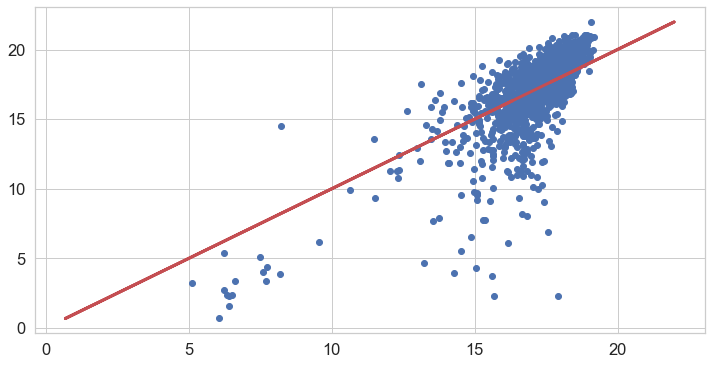

In [23]:
from sklearn.linear_model import ElasticNet

# define model
elastic_model = ElasticNet(random_state=42)

# fit model
elastic_model.fit(X_train, y_train.values.ravel())

# make a prediction
prediction_elastic_test = elastic_model.predict(X_test)
prediction_elastic_train = elastic_model.predict(X_train)


# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_elastic_train))
print("Explained Variance (R^2) on test \t:", elastic_model.score(X_train, y_train))
print("")

print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_elastic_test))
print("Explained Variance (R^2) on test \t:", elastic_model.score(X_test, y_test))


# plot graph
f = plt.figure(figsize=(12,6))
plt.scatter(prediction_elastic_test,y_test)
plt.plot(y_test,y_test,'r-',linewidth=3)
plt.show()


# Comparison

In [24]:
y_test_pred = LinearReg.predict(X_test)
print("Prediction performance --- Linear Regression Model:")
# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) \t:", LinearReg.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Explained Variance (R^2) \t:", LinearReg.score(X_test, y_test))

print()

print("Prediction performance --- Ridge Regression Model:")
# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, prediction_RR_train))
print("Explained Variance (R^2) \t:", model_RR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, prediction_RR_test))
print("Explained Variance (R^2) \t:", model_RR.score(X_test, y_test))

print()

print("Prediction performance --- LASSO Regression Model:")
# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, prediction_LAR_train))
print("Explained Variance (R^2) \t:", model_LAR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, prediction_LAR_test))
print("Explained Variance (R^2) \t:", model_LAR.score(X_test, y_test))

print()

print("Prediction performance --- Elastic Net Regression Model:")
# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, prediction_elastic_train))
print("Explained Variance (R^2) \t:", elastic_model.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, prediction_elastic_test))
print("Explained Variance (R^2) \t:", elastic_model.score(X_test, y_test))

Prediction performance --- Linear Regression Model:
Performance on Train Data:
Mean Squared Error (MSE) 	: 3.53721355253645
Explained Variance (R^2) 	: 0.5069393988364966
Performance on Test Data:
Mean Squared Error (MSE) 	: 3.6235256679921126
Explained Variance (R^2) 	: 0.5656126492217683

Prediction performance --- Ridge Regression Model:
Performance on Train Data:
Mean Squared Error (MSE) 	: 3.5372135668282727
Explained Variance (R^2) 	: 0.5069393968443254
Performance on Test Data:
Mean Squared Error (MSE) 	: 3.623560099454473
Explained Variance (R^2) 	: 0.5656085215866724

Prediction performance --- LASSO Regression Model:
Performance on Train Data:
Mean Squared Error (MSE) 	: 3.7918686908272585
Explained Variance (R^2) 	: 0.47144241407429455
Performance on Test Data:
Mean Squared Error (MSE) 	: 4.062306016173247
Explained Variance (R^2) 	: 0.5130117708276682

Prediction performance --- Elastic Net Regression Model:
Performance on Train Data:
Mean Squared Error (MSE) 	: 3.730120019

# Prediction of Response based on the Predictor

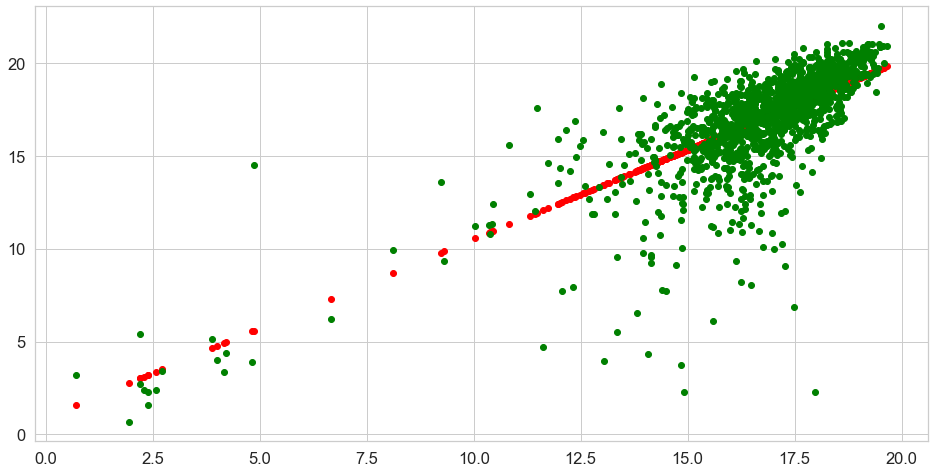

In [25]:
# Predict Revenue values corresponding to Budget
y_test_pred = LinearReg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test_pred, color = "red")
plt.scatter(X_test, y_test, color = "green")

plt.show()

In [26]:
# Compute R^2 & MSE on the test set
print("Performance on Test Data:")
print("Explained Variance (R^2) \t:", LinearReg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Performance on Test Data:
Explained Variance (R^2) 	: 0.5656126492217683
Mean Squared Error (MSE) 	: 3.6235256679921126


# Predicting Revenue using Popularity

In [27]:
movie_data["POPULARITY"].describe()

count    5416.000000
mean       19.398283
std        26.162331
min         0.600000
25%         9.301250
50%        13.602000
75%        21.862000
max       936.725000
Name: POPULARITY, dtype: float64

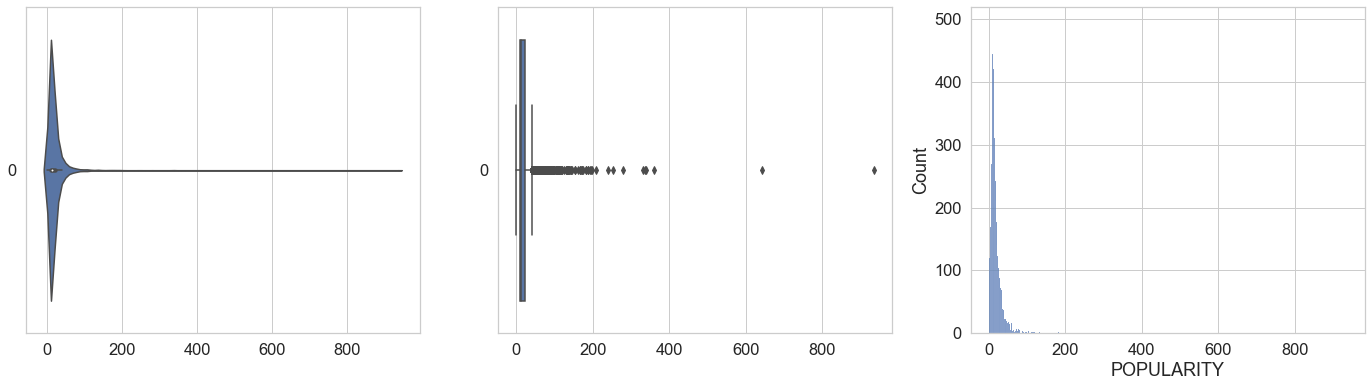

In [28]:
Uni_Variate(movie_data["POPULARITY"])

<AxesSubplot:xlabel='POPULARITY', ylabel='Count'>

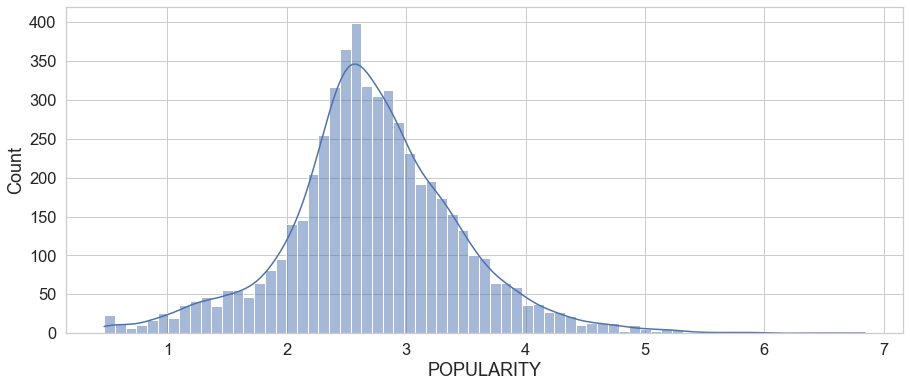

In [29]:
movie_data["POPULARITY"] = np.log(movie_data["POPULARITY"] + 1)

f = plt.figure(figsize=(15,6))

sb.histplot(movie_data["POPULARITY"], kde=True)

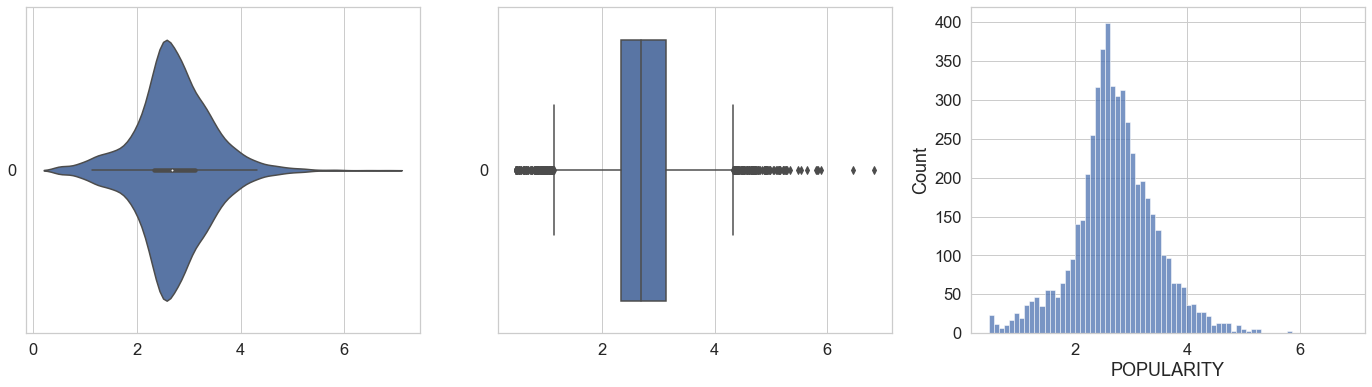

In [30]:
Uni_Variate(movie_data["POPULARITY"])

<Figure size 1728x288 with 0 Axes>

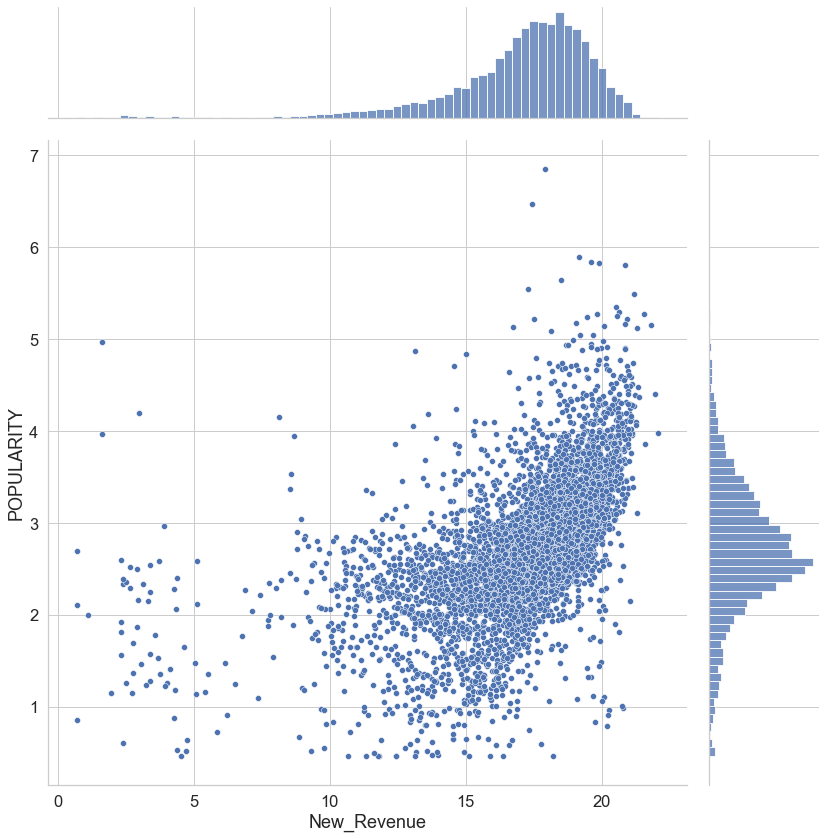

In [31]:
Bi_Variate(movie_data, 'New_Revenue', "POPULARITY")

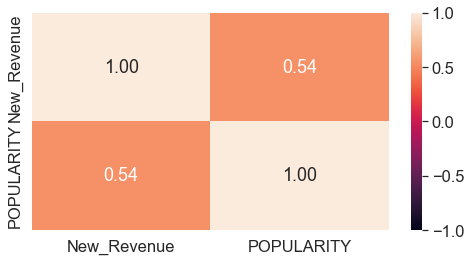

In [32]:
Correlation(movie_data, 'New_Revenue', "POPULARITY")

# LINEAR REGRESSION FOR REVENUE AND POPULARITY

In [33]:
# Extract Response and Predictors
y = pd.DataFrame(movie_data['New_Revenue'])
X = pd.DataFrame(movie_data['POPULARITY'])

# Split the Dataset into random Train and Test
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", train_x.shape, train_y.shape)
print("Test Set  :", test_x.shape, test_y.shape)

Train Set : (4062, 1) (4062, 1)
Test Set  : (1354, 1) (1354, 1)


In [34]:
LinearReg.fit(train_x, train_y)
print('Intercept : b = ', LinearReg.intercept_)
print('Coefficients : a = ', LinearReg.coef_)

Intercept : b =  [11.45786845]
Coefficients : a =  [[2.05155976]]


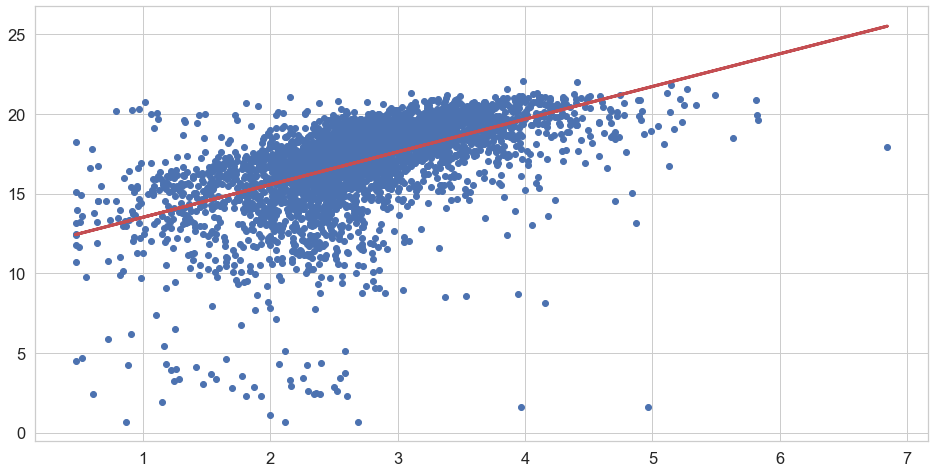

In [35]:
# Formula for the Regression line
regline_x = train_x
regline_y = LinearReg.intercept_ + LinearReg.coef_ * train_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(train_x, train_y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [36]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", LinearReg.score(train_x, train_y))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
test_y_pred = LinearReg.predict(train_x)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y, test_y_pred))

Explained Variance (R^2) 	: 0.2930793953137538
Mean Squared Error (MSE) 	: 5.357982913204631


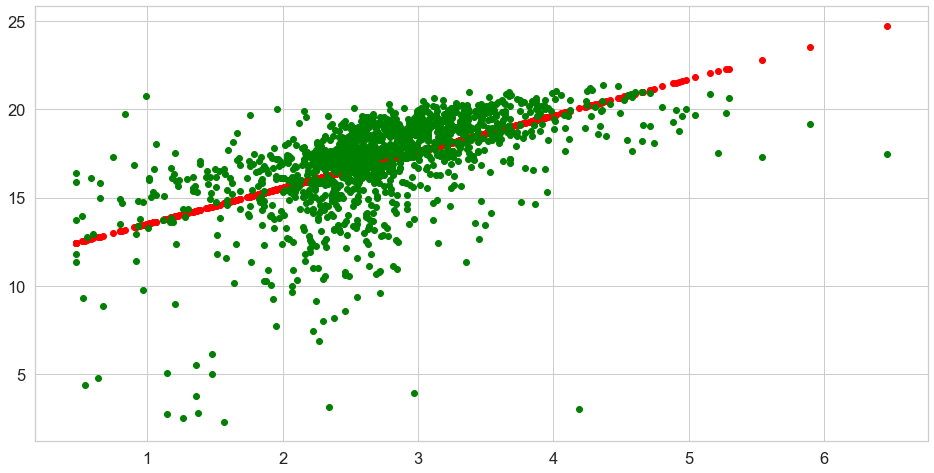

In [37]:
# Predict Revenue values corresponding to Budget
test_y_pred = LinearReg.predict(test_x)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(test_x, test_y_pred, color = "red")
plt.scatter(test_x, test_y, color = "green")

plt.show()

In [38]:
# Compute R^2 & MSE on the test set
print("Explained Variance (R^2) \t:", LinearReg.score(test_x, test_y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_y, test_y_pred))

Explained Variance (R^2) 	: 0.300808521555362
Mean Squared Error (MSE) 	: 4.993445649370064


# Predicting Revenue using Runtime

In [39]:
movie_data["RUNTIME"].describe()

count    5416.000000
mean      109.115214
std        21.322490
min         0.000000
25%        95.000000
50%       105.000000
75%       120.000000
max       339.000000
Name: RUNTIME, dtype: float64

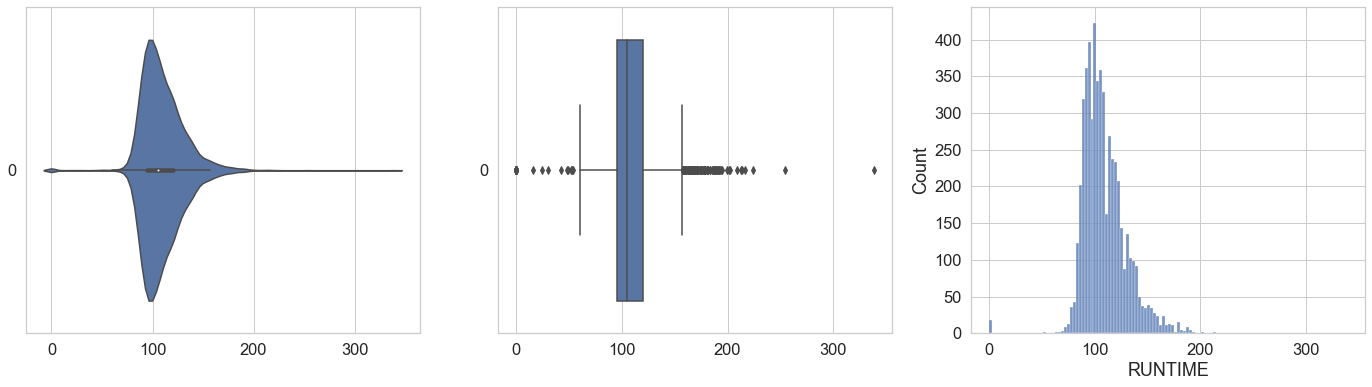

In [40]:
Uni_Variate(movie_data["RUNTIME"])

<Figure size 1728x288 with 0 Axes>

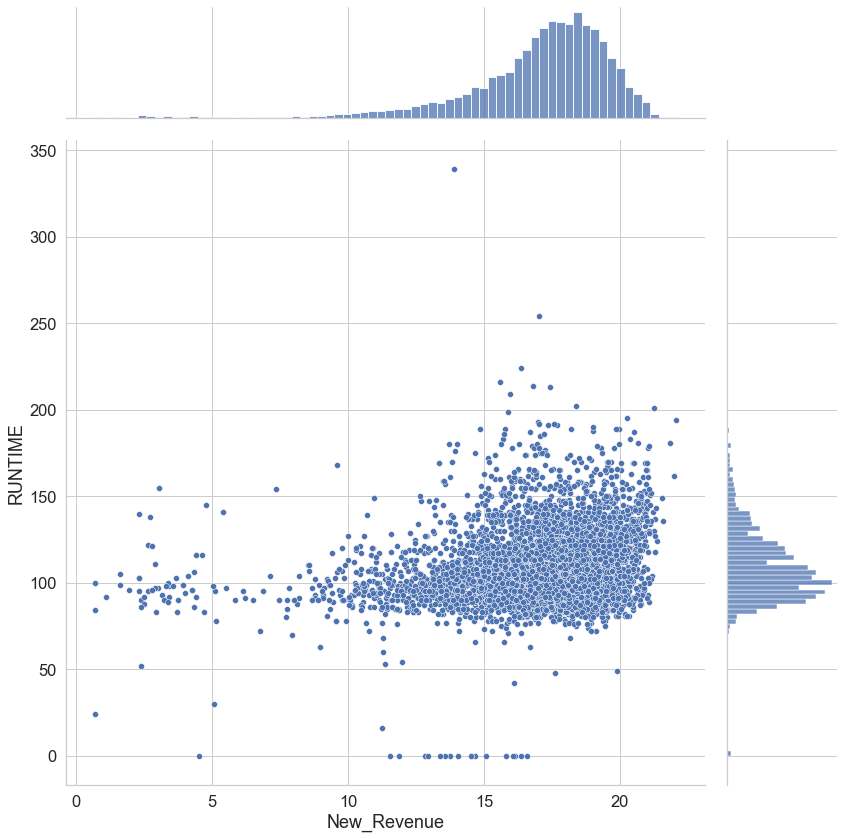

In [41]:
Bi_Variate(movie_data, 'New_Revenue', "RUNTIME")

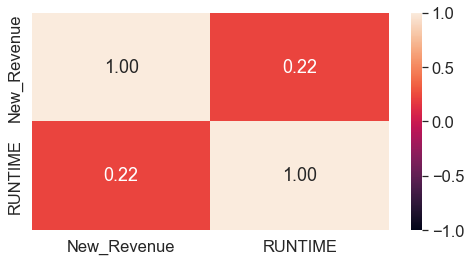

In [42]:
Correlation(movie_data, 'New_Revenue', "RUNTIME")

# LINEAR REGRESSION FOR REVENUE AND RUNTIME

In [43]:
# Extract Response and Predictors
y = pd.DataFrame(movie_data['New_Revenue'])
X = pd.DataFrame(movie_data['RUNTIME'])

# Split the Dataset into random Train and Test
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", train_x.shape, train_y.shape)
print("Test Set  :", test_x.shape, test_y.shape)

Train Set : (4062, 1) (4062, 1)
Test Set  : (1354, 1) (1354, 1)


In [44]:
LinearReg.fit(train_x, train_y)
print('Intercept : b = ', LinearReg.intercept_)
print('Coefficients : a = ', LinearReg.coef_)

Intercept : b =  [13.96205601]
Coefficients : a =  [[0.02831661]]


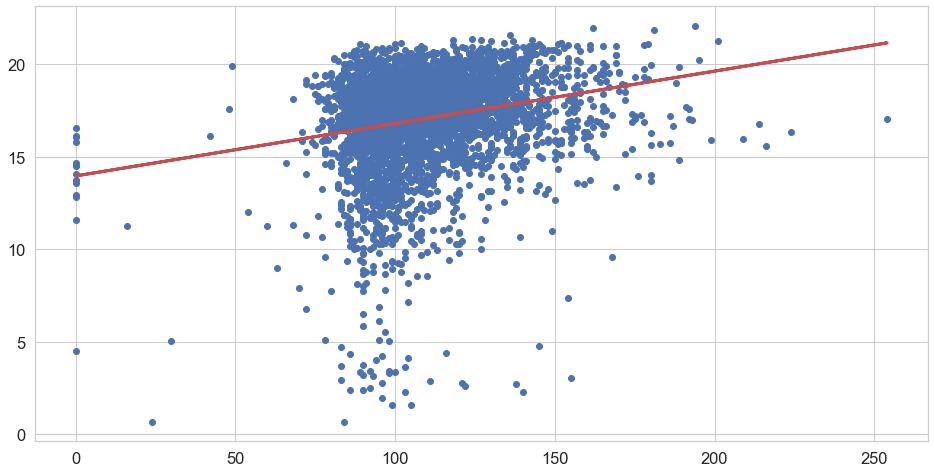

In [45]:
# Formula for the Regression line
regline_x = train_x
regline_y = LinearReg.intercept_ + LinearReg.coef_ * train_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(train_x, train_y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [46]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", LinearReg.score(train_x, train_y))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
test_y_pred = LinearReg.predict(train_x)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y, test_y_pred))

Explained Variance (R^2) 	: 0.048399798641599046
Mean Squared Error (MSE) 	: 6.971249613918859


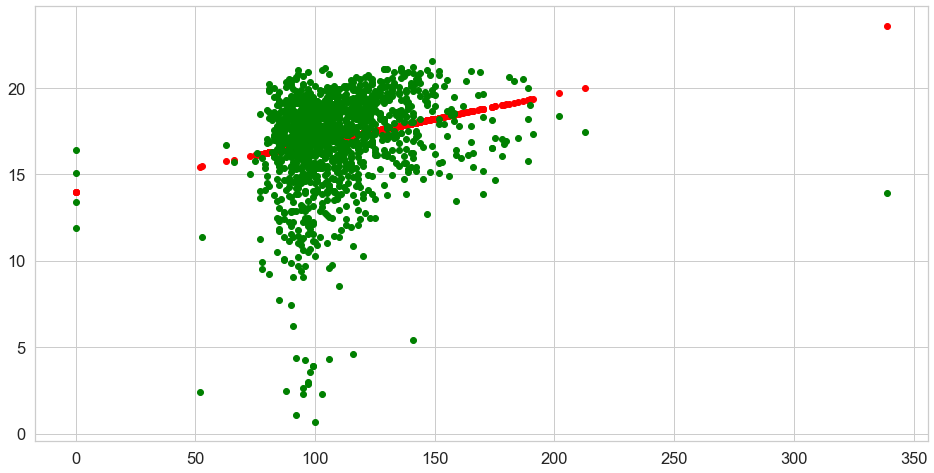

In [47]:
# Predict Revenue values corresponding to Budget
test_y_pred = LinearReg.predict(test_x)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(test_x, test_y_pred, color = "red")
plt.scatter(test_x, test_y, color = "green")

plt.show()

In [48]:
# Compute R^2 & MSE on the test set
print("Explained Variance (R^2) \t:", LinearReg.score(test_x, test_y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_y, test_y_pred))

Explained Variance (R^2) 	: 0.053228322192177324
Mean Squared Error (MSE) 	: 7.480038202063881


# PREDICT REVENUE VALUE USING  VOTE_AVERAGE

In [49]:
movie_data.sort_values(by = 'VOTE_AVERAGE', ascending = False)
movie_data.head()

,BUDGET,POPULARITY,REVENUE,RUNTIME,VOTE_AVERAGE,VOTE_COUNT,release_year,release_month,New_Budget,New_Revenue,New_Vote_Avg
0,19.113828,6.843457,17.858562,115.0,7.3,2445,2020,4,19.172097,17.916831,7
1,16.648724,6.465574,17.395642,114.0,7.1,602,2020,7,16.706993,17.453911,7
2,18.132999,5.892299,19.123077,109.0,7.2,6022,2020,5,18.191268,19.181346,7
3,18.315320,5.824069,19.853560,124.0,7.2,5392,2020,1,18.373589,19.911829,7
4,17.553180,5.540852,17.224484,110.0,7.0,3216,2020,5,17.611449,17.282753,7


In [50]:
movie_data["VOTE_AVERAGE"].describe()

count    5416.000000
mean        6.328619
std         0.901775
min         0.000000
25%         5.800000
50%         6.400000
75%         6.900000
max        10.000000
Name: VOTE_AVERAGE, dtype: float64

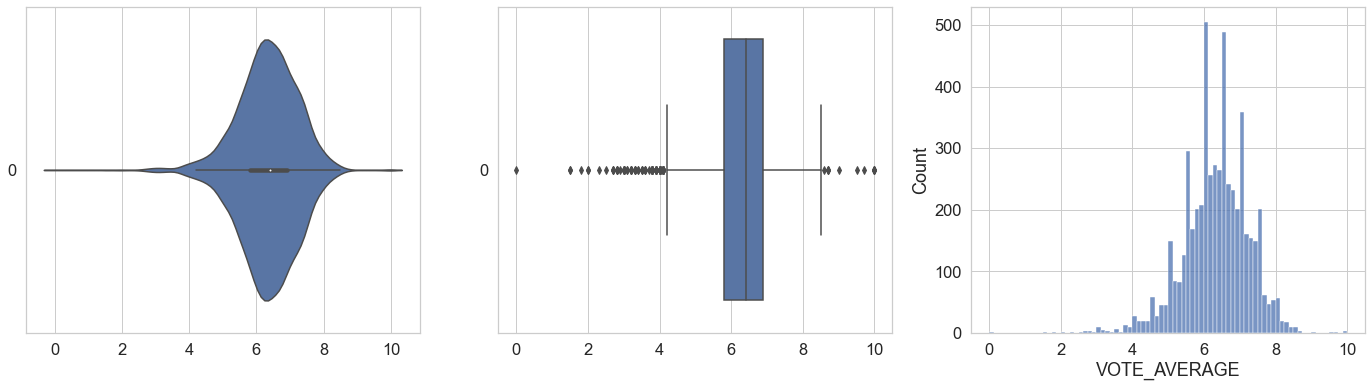

In [51]:
Uni_Variate(movie_data["VOTE_AVERAGE"])

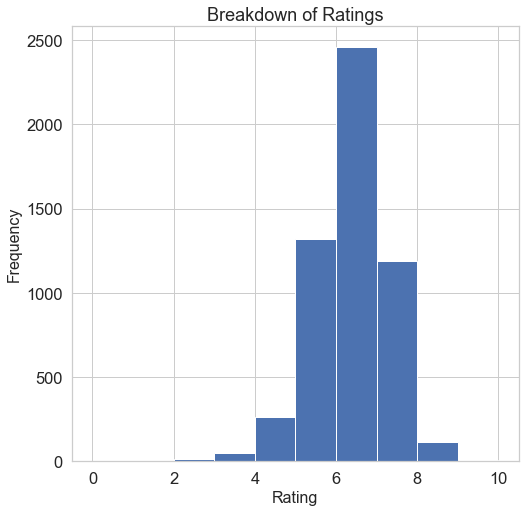

In [52]:
movie_data['VOTE_AVERAGE'].plot(kind='hist', figsize = (8,8));
plt.title('Breakdown of Ratings', fontsize = 18)
plt.xlabel('Rating', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16);

In [53]:
revenue_vote= pd.DataFrame(movie_data, columns= ['New_Revenue','VOTE_AVERAGE'])

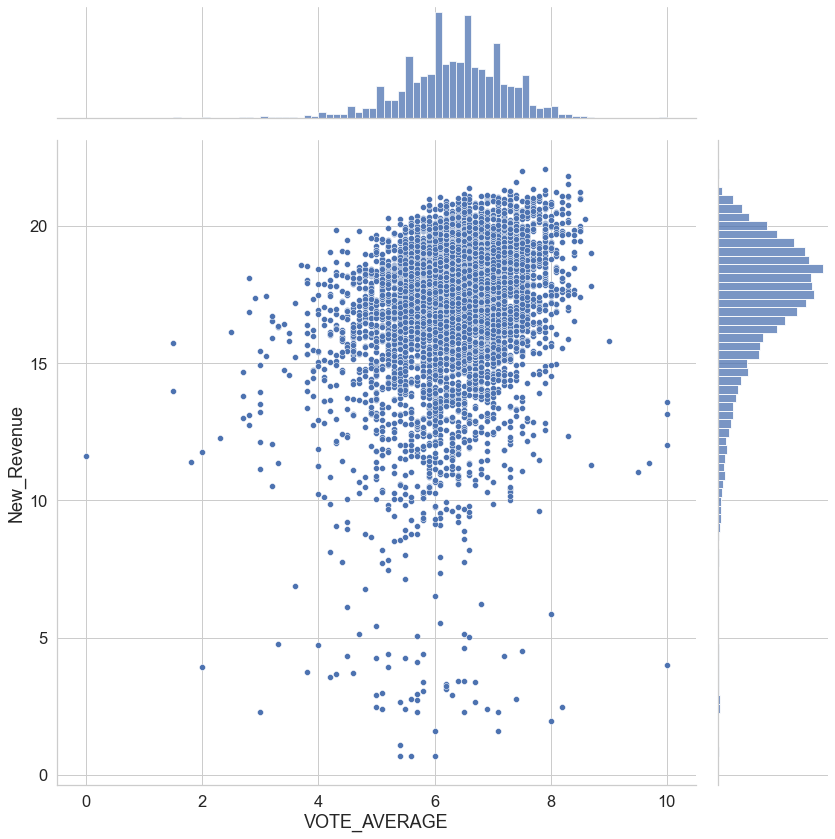

In [54]:
sb.jointplot(data = revenue_vote, x = "VOTE_AVERAGE", y = "New_Revenue", height = 12)

In [55]:
revenue_vote.describe()

,New_Revenue,VOTE_AVERAGE
count,5416.000000,5416.000000
mean,17.036126,6.328619
std,2.733407,0.901775
min,0.693147,0.000000
25%,16.005499,5.800000
50%,17.579654,6.400000
75%,18.794041,6.900000
max,22.053321,10.000000


In [56]:
revenue_vote.sort_values(by = 'VOTE_AVERAGE', ascending = True)

,New_Revenue,VOTE_AVERAGE
5110,11.613223,0.0
4947,13.980126,1.5
3634,15.741638,1.5
3738,11.394074,1.8
4410,11.757737,2.0
...,...,...
4777,11.343986,9.7
4767,13.576239,10.0
4474,4.007333,10.0
4661,13.138288,10.0


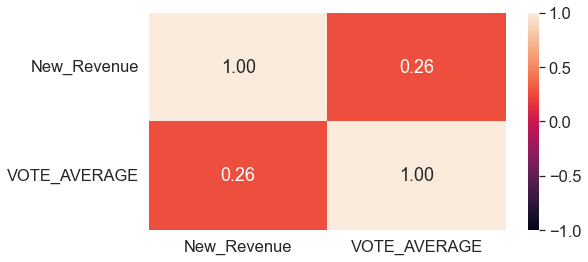

In [57]:
Correlation(revenue_vote, 'New_Revenue', "VOTE_AVERAGE")

In [58]:
# Extract Response and Predictors
y = pd.DataFrame(revenue_vote['New_Revenue'])
X = pd.DataFrame(revenue_vote["VOTE_AVERAGE"])

# Split the Dataset into random Train and Test
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", train_x.shape, train_y.shape)
print("Test Set  :", test_x.shape, test_y.shape)

Train Set : (4062, 1) (4062, 1)
Test Set  : (1354, 1) (1354, 1)


In [59]:
LinearReg.fit(train_x, train_y)
print('Intercept : b = ', LinearReg.intercept_)
print('Coefficients : a = ', LinearReg.coef_)

Intercept : b =  [12.07063003]
Coefficients : a =  [[0.78381645]]


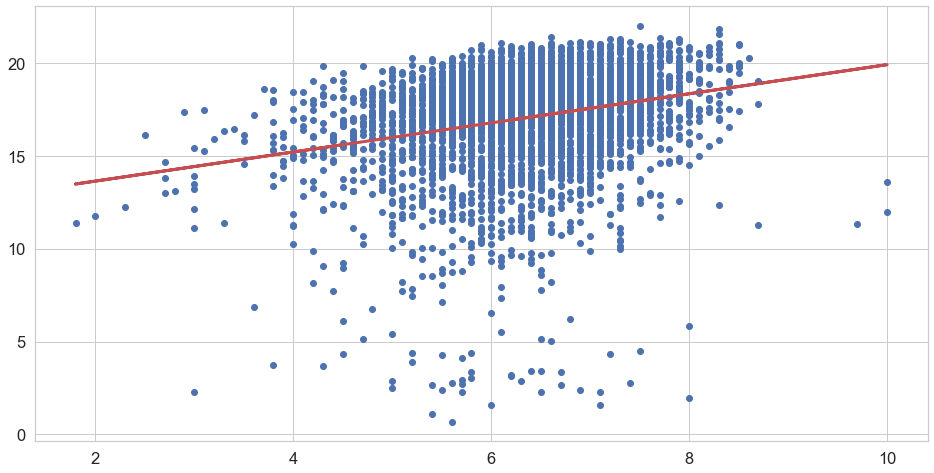

In [60]:
# Formula for the Regression line
regline_x = train_x
regline_y = LinearReg.intercept_ + LinearReg.coef_ * train_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(train_x, train_y)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [61]:
# Explained Variance in simply the "Score"
print("Explained Variance (R^2) \t:", LinearReg.score(train_x, train_y))

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
train_y_pred = LinearReg.predict(train_x)

# Compute MSE on the train set
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_y, train_y_pred))

Explained Variance (R^2) 	: 0.06420711223805353
Mean Squared Error (MSE) 	: 7.048537350773876


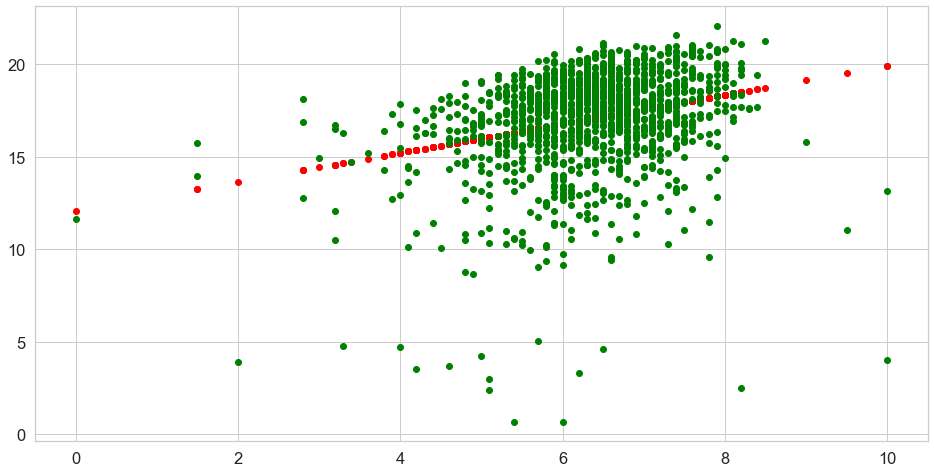

In [62]:
# Predict Revenue values corresponding to New_Vote_Avg
test_y_pred = LinearReg.predict(test_x)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(test_x, test_y_pred, color = "red")
plt.scatter(test_x, test_y, color = "green")

plt.show()

In [63]:
# Compute R^2 & MSE on the test set
print("Explained Variance (R^2) \t:", LinearReg.score(test_x, test_y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_y, test_y_pred))

Explained Variance (R^2) 	: 0.08049695183661487
Mean Squared Error (MSE) 	: 6.69731745883133
